# Ecommerce
Ask yourself 15 analystical questions that you belive will help the managers in decision making

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('D:\E commerce analysis assignment\E commerce analysis assignment\ecommerce.csv')
df.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART


In [3]:
df.shape

(700, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       700 non-null    int64  
 1   UnitPrice       700 non-null    float64
 2   OrderValue      700 non-null    float64
 3   Quantit         700 non-null    int64  
 4   Country         700 non-null    object 
 5    InvoiceDate    700 non-null    object 
 6   InvoiceTime     700 non-null    object 
 7   Year-Month      700 non-null    object 
 8   Major Category  700 non-null    object 
 9   Minor Category  700 non-null    object 
 10  Description     700 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 60.3+ KB


### Fix Date columns 

1- get day from InvoiceDate columns

In [5]:
day = df[' InvoiceDate'].str.split('/',expand=True)[0] ;

2- remove the spaces

In [6]:
day = day.str.strip()

3- remove the spaces from the Year-Month column and append the day to it

In [7]:
df['Date'] =  df['Year-Month'].str.strip()+'-'+day

4- drop InvoiceDate and Year-Month columns

In [8]:
df.drop(columns=[' InvoiceDate','Year-Month'],inplace=True)

5- convert Date column to date-time type

In [9]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

## Answer the Questions

### 1- What are the total Order value for each country

In [10]:
df.groupby('Country')['OrderValue'].sum().sort_values(ascending=False)

Country
     Australia       6349.89
        France       5638.16
United Kingdom       5582.93
       Germany       3153.71
     Hong Kong       1660.24
Name: OrderValue, dtype: float64

### 2- What each Major Category sold quantity during November 2011

In [11]:
df[(df['Date']>='2011-11-01') & (df['Date']<'2011-12-01')].groupby('Major Category')['Quantit'].sum().sort_values(ascending=False)

Major Category
    Kitchen      538
     Garden      449
    Clothes      280
  Household      246
Name: Quantit, dtype: int64

### 3- What's Total Order Value for each Minor Item in Kitchen


In [12]:
df[df['Major Category']=='    Kitchen  '].groupby('Minor Category')['OrderValue'].sum().sort_values(ascending=False)

Minor Category
        Scales    1691.79
         Bowls    1227.39
        Plates    1148.67
Cooking Knives    1055.46
       Cutlery     960.29
      Coasters     324.30
Name: OrderValue, dtype: float64

### 4- What Month/s contributes to high demand in orders


In [13]:
df['Month'] = df['Date'].dt.month

In [14]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [15]:
df.groupby('Month')['InvoiceNo  '].sum().sort_index()

Month
1     36809131
2     18489943
3     29531315
4     16501084
5     36515946
6     28940238
7     24094585
8     29319089
9     38566897
10    33125675
11    61156889
12    38375769
Name: InvoiceNo  , dtype: int64

<Axes: xlabel='Month'>

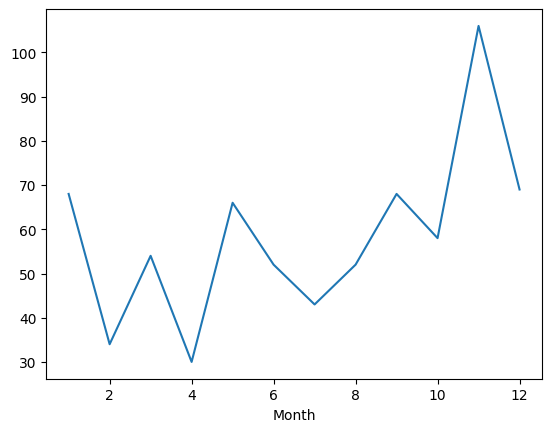

In [16]:
df.groupby('Month')['InvoiceNo  '].count().sort_index().plot(kind='line')

### 5- What Month/s contributes to high OrderValue?


In [17]:
df.groupby('Month')['OrderValue'].sum().sort_values(ascending=False)


Month
11    2553.74
5     2394.34
9     2339.75
8     2327.19
3     2324.19
1     2080.25
6     1878.89
2     1758.76
7     1562.23
10    1382.54
12    1194.22
4      588.83
Name: OrderValue, dtype: float64

<Axes: xlabel='Month'>

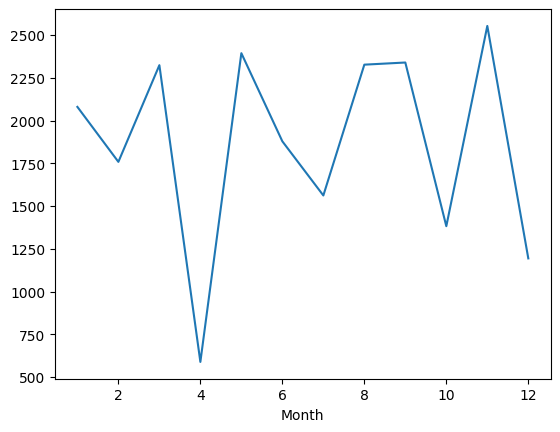

In [18]:
df.groupby('Month')['OrderValue'].sum().plot(kind='line')

### 6- Why April and December suffer from low sales? 4,12


<Axes: xlabel='Month'>

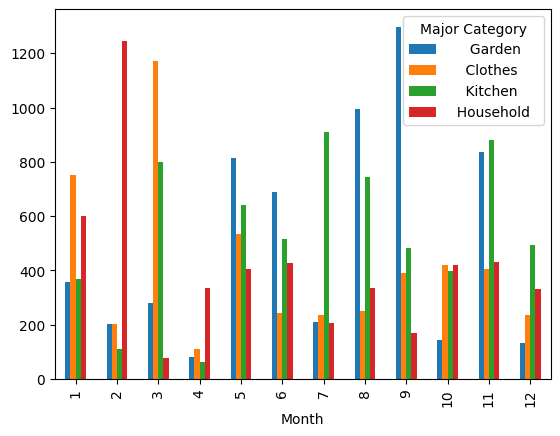

In [19]:
result = df.pivot_table(index='Month', columns='Major Category', values='OrderValue', aggfunc='sum')
result.plot(kind='bar')

Becouse the lowest month sales in Garden,Kitchen and Clothes Categories is 'April' by total sales 588.83

and the 2th lowest month sales in Garden is December by total sales 1194.22

### 7- Why May and November have high sales? 5,11


### 8- Most Major Items sold in April and December 4,12

In [67]:
df[(df['Month']==4) | (df['Month']==12)].groupby('Major Category')['OrderValue'].sum().sort_values(ascending=False).head(1)

Major Category
  Household      665.86
Name: OrderValue, dtype: float64

8.1 Most Major Items sold in April 4


In [68]:
df[(df['Month']==4)].groupby('Major Category')['OrderValue'].sum().sort_values(ascending=False).head(1)

Major Category
  Household      335.02
Name: OrderValue, dtype: float64

8.2 Most Major Items sold in December 12

In [69]:
df[(df['Month']==12)].groupby('Major Category')['OrderValue'].sum().sort_values(ascending=False).head(1)

Major Category
    Kitchen      492.45
Name: OrderValue, dtype: float64

### 9- Most Major Items sold in May and November


In [70]:
df[(df['Month']==5) | (df['Month']==11)].groupby('Major Category')['OrderValue'].sum().sort_values(ascending=False).head(1)

Major Category
     Garden      1651.9
Name: OrderValue, dtype: float64

9.1 Most Major Items sold in May 5

In [71]:
df[(df['Month']==5)].groupby('Major Category')['OrderValue'].sum().sort_values(ascending=False).head(1)

Major Category
     Garden      815.77
Name: OrderValue, dtype: float64

9.2 Most Major Items sold in November 11

In [72]:
df[(df['Month']==11)].groupby('Major Category')['OrderValue'].sum().sort_values(ascending=False).head(1)

Major Category
    Kitchen      880.79
Name: OrderValue, dtype: float64

### 10- What Hour recives high demand for ordering?


In [80]:
df.groupby('InvoiceTime')['InvoiceNo  '].count().sort_values(ascending=False).head(1)

InvoiceTime
   14:09       20
Name: InvoiceNo  , dtype: int64

### 11- What's the Time of the day that contributes to high Order Values?


In [82]:
df.groupby('InvoiceTime')['OrderValue'].sum().sort_values(ascending=False).head(1)

InvoiceTime
   10:59       1297.2
Name: OrderValue, dtype: float64

### 12 - Order VAlue For each Country in each month


In [94]:
df.pivot_table(index=['Country','Month'],values='OrderValue',aggfunc='sum')

Country            Month
        France     1         576.29
                   2         213.60
                   3         508.47
                   4          30.30
                   5         392.82
                   6         514.00
                   7         244.86
                   8         839.34
                   9         379.58
                   10        577.14
                   11       1108.31
                   12        253.45
       Germany     1         279.10
                   2         420.50
                   3          50.55
                   4          98.00
                   5         753.30
                   6         138.38
                   7         221.99
                   8         137.55
                   9         217.26
                   10        167.46
                   11        356.84
                   12        312.78
     Australia     1         471.30
                   2         511.94
                   3        1360.70
   

In [95]:
df.columns

Index(['InvoiceNo  ', 'UnitPrice', 'OrderValue', 'Quantit', 'Country',
       'InvoiceTime', 'Major Category', 'Minor Category', 'Description',
       'Date', 'Month'],
      dtype='object')

### 13 - Order VAlue For each Country and Major Category in Minor Category



In [96]:
df.pivot_table(index=['Country','Major Category','Minor Category'],values='OrderValue',aggfunc='sum')

OrderValue
Country           Major Category Minor Category            
        France         Garden              Turf      653.75
                                          Hoses      630.55
                                          Rakes      223.94
                                          Seeds      380.16
                      Clothes              Hats      431.42
...                                                     ...
United Kingdom        Kitchen    Cooking Knives      136.61
                    Household              Rugs      165.08
                                          Lamps      148.83
                                         Chairs      420.08
                                       Curtains      768.11

[83 rows x 1 columns]

### 14 -Correlation between 'Quantit','OrderValue','UnitPrice'.


In [101]:
df[['Quantit','OrderValue','UnitPrice']].corr()

,Quantit,OrderValue,UnitPrice
Quantit,1.000000,0.696566,-0.072481
OrderValue,0.696566,1.000000,0.122778
UnitPrice,-0.072481,0.122778,1.000000
